# Overview

Analysis of several widely available movie ratings sources finds that there are key genres and original languages that Microsoft should produce movies in to achieve higher box office results

- Movies that have higher average ratings have a higher average box office value.
- The most highly rated movie genres are Biographies, Documentaries, History and Music.
- Movies have different average ratings based on the original language that they were produced in. Microsoft should avoid producing movies in Russian explore producing movies in Japanese. 


# Business Overview

- Microsoft would like to open a movie production studio but they have no internal experience in producing movies.
- Explore 11 datasets gathered from 5 different sources to find actionable insights for the newly created Microsoft production team.
- Focus on the different types of movies that team should focus on producing. 


# Data Undertanding

Merge different data sets from the same sources based on ID fields to find more complete data sets. In this case, we'll use datasets from Rotten Tomatoes, IMDB and The Movie Database.

In [1]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Movies with Higher Average Ratings Perform Better

Load the data shees from Rotten Tomatoes. Both sheets include an ID that I can match on to see if movie ratings are an indicator of results at the box office. 

In [48]:
#add the two rotten tomatoes data sheets into jupiter notebook and explore how we can merge them

rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
#assign negative and postive 1 values to the fresh column so that i can use group by and sum to gather overall rating
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t')
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [3]:
# assume that I can group the ID's and summarize the fresh vs rotten values in the fresh column to yield 
# an overall picture of each movie's rating
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [4]:


#assign negative and postive 1 values to the fresh column so that i can use group by and sum to gather overall rating
# add a new column for overall rating
rt_reviews['fresh'] = rt_reviews['fresh'].map(lambda x: 1 if x == 'fresh' else -1)
rt_reviews = rt_reviews.groupby(['id']).sum()

In [5]:
rt_reviews['Overall Fresh'] = rt_reviews['fresh'].apply(lambda x: 'fresh' if x >=0 else 'rotten')


In [6]:
#merge the movie info table with the rating table 
rt_movie_ratings = rt_movie_info.merge(rt_reviews, on='id', how='left')
rt_movie_ratings.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,fresh,top_critic,Overall Fresh
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,43.0,34.0,fresh
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,13.0,5.0,fresh
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,7.0,19.0,fresh
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN,NaN,NaN


In [7]:
# drop movies that don't have a theater date at all, then create a new column with just the year and filter 
# for movies that had theater dates in the last 10 years
# drop movies that don't have box office results

rt_movie_ratings.dropna(subset = ['theater_date'], inplace=True)
rt_movie_ratings['Theater Year'] = rt_movie_ratings['theater_date'].map(lambda x: int(x[-4:]))
rt_movie_ratings = rt_movie_ratings[rt_movie_ratings['Theater Year'] >= 2011]
rt_movie_ratings.dropna(subset = ['box_office'], inplace=True)

In [8]:
# confirm that the only currency for box office is in dollars

rt_movie_ratings['currency'].value_counts()

$    113
Name: currency, dtype: int64

In [9]:
# create a new column for box office values as an integer so that we can apply math functions 
rt_movie_ratings['int_box_office'] = rt_movie_ratings['box_office'].apply(lambda x: int(x.replace(',','')))

In [10]:
# set y values for average of movies with fresh vs rotten ratings
y_fresh = int(rt_movie_ratings[rt_movie_ratings['Overall Fresh'] == 'fresh']['int_box_office'].mean())
y_rotten = int(rt_movie_ratings[rt_movie_ratings['Overall Fresh'] == 'rotten']['int_box_office'].mean())

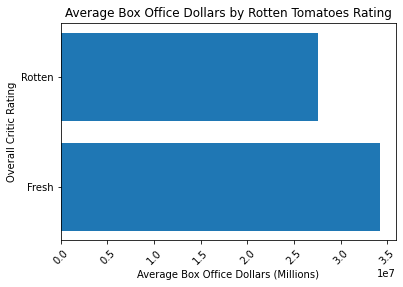

In [50]:
# plot the graph and convert the int_box_office values to currency for better visualization

fig, ax = plt.subplots(figsize=(6, 4))

y = [y_fresh, y_rotten]
x = ['Fresh','Rotten']
plt.xticks(rotation = 45)


ax.barh(x,y)
plt.xlabel('Average Box Office Dollars (Millions)')
plt.ylabel('Overall Critic Rating')
plt.title('Average Box Office Dollars by Rotten Tomatoes Rating')
plt.show()


### Average Box Office Dollars by Rating Analysis

On average, movies with 'Fresh' ratings have better results at the box office than those with 'Rotten' ratings.

## Key Movie Genres

Both sheets include an ID that I can match on to see if different genres have higher ratings, and thusly higher returns at the box office. 

In [58]:
#loading IMDB data set for ratings
imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz', sep='\t', encoding='latin1')


In [54]:
imdb_title_basic = pd.read_csv('data/imdb.title.basics.csv')

In [59]:
# data looks super messy, let's clean it up
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   tconst,"averagerating","numvotes"  73856 non-null  object
dtypes: object(1)
memory usage: 577.1+ KB


In [60]:
# used a for loop to take the unstructured data and make it into a list of lists to easily convert to a new dataframe

all_tconst = []

for i in range(len(imdb_ratings)): 
    tconst = imdb_ratings['tconst,"averagerating","numvotes"'][i].split(',')
    all_tconst.append(tconst)


In [61]:
# created a new dataframe, noticed all the quotes
# used lambda functions to remove quotes and create data types that are not object

imdb_ratings_cleaned = pd.DataFrame(all_tconst, columns = ['tconst','Average Rating','Number of Votes'])
imdb_ratings_cleaned['Average Rating'] = imdb_ratings_cleaned['Average Rating'].map(lambda x: float(x.replace('"','')))
imdb_ratings_cleaned['Number of Votes'] =imdb_ratings_cleaned['Number of Votes'].map(lambda x: int(x.replace('"','')))
imdb_ratings_cleaned.head()

,tconst,Average Rating,Number of Votes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [62]:
imdb_title_basic.head()

# I can use the 'tconst' ID to match the two tables, and I'll have to separate the 'genres' to find the genres
# that yield the highest ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [63]:
# merge imdb_title_basic and imdb_ratings_cleaned together
# i want imdb_title_basic to be the left table and to merge any matching values from
# the right table imdb_ratings_cleaned based on the tconst id to populate as well

imdb_title_ratings = imdb_title_basic.merge(imdb_ratings_cleaned, on='tconst', how='left')
imdb_title_ratings.shape

(146144, 8)

In [64]:

# pull out generes to isolate them

clean_genres = imdb_title_ratings[['tconst','genres']]
clean_genres.dropna(inplace=True)
clean_genres

<ipython-input-64-1841d1d17ef5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_genres.dropna(inplace=True)


,tconst,genres
0,tt0063540,"Action,Crime,Drama"
1,tt0066787,"Biography,Drama"
2,tt0069049,Drama
3,tt0069204,"Comedy,Drama"
4,tt0100275,"Comedy,Drama,Fantasy"
...,...,...
146138,tt9916428,"Adventure,History,War"
146139,tt9916538,Drama
146140,tt9916622,Documentary
146141,tt9916706,Comedy


In [65]:
# isolate the genres and create a list of them

genre_dct_lst = clean_genres['genres'].map(lambda x: {g:1 for g in x.split(',')}).tolist()
genre_df = pd.DataFrame(genre_dct_lst).fillna(0).astype(int)


genre_list = list(genre_df.columns)
genre_list

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

In [66]:
# The combined df
genres_combined = pd.concat([clean_genres.reset_index(drop=True), genre_df], axis=1)
genres_combined

,tconst,genres,Action,Crime,Drama,Biography,Comedy,Fantasy,Horror,Thriller,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,"Action,Crime,Drama",1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,"Biography,Drama",0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,Drama,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,"Comedy,Drama",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,"Comedy,Drama,Fantasy",0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,tt9916428,"Adventure,History,War",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140732,tt9916538,Drama,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140733,tt9916622,Documentary,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140734,tt9916706,Comedy,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


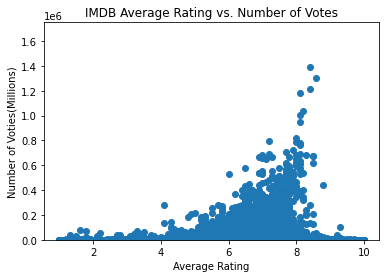

In [67]:
# combine the genres_combined table with imdb titles and ratings so that we can isolate the most highly rated genres

imdb_title_ratings_genres = imdb_title_ratings.merge(genres_combined, on='tconst', how='left' )

# let's see if more votes is correlated with a higher rating, re ran this with clean data set 

import numpy as np
import matplotlib.pyplot as plt

x = imdb_title_ratings_genres['Average Rating']
y = imdb_title_ratings_genres['Number of Votes']

plt.ylim(0,1750000)
plt.xlabel('Average Rating')
plt.ylabel('Number of Voties(Millions)')
plt.title('IMDB Average Rating vs. Number of Votes')
plt.scatter(x,y)
plt.show()

# looks like there is a relationship between having more ratings and having a higher average rating. 
# it also looks like there's a lot of ratings that have a very low number of votes, i'm probably going to eliminate those 
# since i'm not really concerned with what only a few people thought




In [68]:
imdb_title_ratings_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres_x,Average Rating,Number of Votes,genres_y,Action,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"Action,Crime,Drama",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"Biography,Drama",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,"Comedy,Drama",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"Comedy,Drama,Fantasy",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,Documentary,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# drop null values 

imdb_title_ratings_genres.dropna(subset = ['genres_x'], inplace=True)

In [70]:
imdb_title_ratings_genres['Genres'] = imdb_title_ratings_genres['genres_x'].map(lambda x: x.split(','))
imdb_title_ratings_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres_x,Average Rating,Number of Votes,genres_y,Action,...,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short,Genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"Action,Crime,Drama",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"Biography,Drama",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,"Comedy,Drama",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"Comedy,Drama,Fantasy",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN,"Adventure,History,War",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Adventure, History, War]"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Drama]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,Documentary,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,Comedy,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Comedy]


In [71]:
# filter the data to only include movies that have a rating

imdb_title_ratings_genres.dropna(subset = ['Average Rating'], inplace=True)


In [72]:
# I'm not sure why there would be null values for run time. I'm going to assume that there wouldn't be
# null values for movies that were popular and came from reputable production studios, so i'll drop those as well

imdb_title_ratings_genres.dropna(subset = ['genres_x'], inplace=True)
imdb_title_ratings_genres.dropna(subset = ['runtime_minutes'], inplace=True)
imdb_title_ratings_genres = imdb_title_ratings_genres[imdb_title_ratings_genres['start_year'] >= 2011]
imdb_title_ratings_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59682 entries, 0 to 146134
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           59682 non-null  object 
 1   primary_title    59682 non-null  object 
 2   original_title   59682 non-null  object 
 3   start_year       59682 non-null  int64  
 4   runtime_minutes  59682 non-null  float64
 5   genres_x         59682 non-null  object 
 6   Average Rating   59682 non-null  float64
 7   Number of Votes  59682 non-null  float64
 8   genres_y         59682 non-null  object 
 9   Action           59682 non-null  float64
 10  Crime            59682 non-null  float64
 11  Drama            59682 non-null  float64
 12  Biography        59682 non-null  float64
 13  Comedy           59682 non-null  float64
 14  Fantasy          59682 non-null  float64
 15  Horror           59682 non-null  float64
 16  Thriller         59682 non-null  float64
 17  Adventure  

In [73]:
#noticing here that some genres have extremely high ratings when there's very few results for that genre

imdb_title_ratings_genres[imdb_title_ratings_genres['Short'] == 1]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres_x,Average Rating,Number of Votes,genres_y,Action,...,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short,Genres
139971,tt9060598,Requiescat,Requiescat,2018,18.0,"Drama,Short",8.8,8.0,"Drama,Short",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[Drama, Short]"


In [74]:
#create a dictionary of genres with their corresponding value counts


genres_dict = {}
for genre in genre_list:
    genres_dict[genre] = imdb_title_ratings_genres[genre].sum()
    
#now find a list of all the values in the dictionary so that I can find the low outliers of the data set
value_list = []

for val in genres_dict.values():
    value_list.append(val)
    
q3 = np.percentile(value_list, 25, interpolation = 'midpoint')

In [75]:
# add the cleaned dictionary with no outlier values and create the lsit of genres

dict_cleaned = {}

for (key,value) in genres_dict.items():
    if value > q3:
        dict_cleaned[key] = value
        
cleaned_genres = []

for genre in dict_cleaned.keys():
    cleaned_genres.append(genre)

In [76]:
# find the average rating for each genre for y and then add the genre for x 
average_rating = []
average_matched_genre = []

for genre in cleaned_genres:
    if imdb_title_ratings_genres[imdb_title_ratings_genres[genre] == 1]['Average Rating'].mean() > 7.0:
        average_matched_genre.append(genre)
        average_rating.append(imdb_title_ratings_genres[imdb_title_ratings_genres[genre] == 1]['Average Rating'].mean())
    
average_rating

[7.1729247247843, 7.319453030506633, 7.056365124846511, 7.072569027611053]

In [77]:
# check medians as well 

median_rating = []
median_matched_genre = []

for genre in cleaned_genres:
    if imdb_title_ratings_genres[imdb_title_ratings_genres[genre] == 1]['Average Rating'].median() > 7.0:
        median_matched_genre.append(genre)
        median_rating.append(imdb_title_ratings_genres[imdb_title_ratings_genres[genre] == 1]['Average Rating'].median())

        
median_matched_genre   

['Biography', 'Documentary', 'History', 'Music', 'Sport']

In [78]:
#let's add a line on the y axis to show the average rating across all genres

av_overall = imdb_title_ratings_genres['Average Rating'].mean()

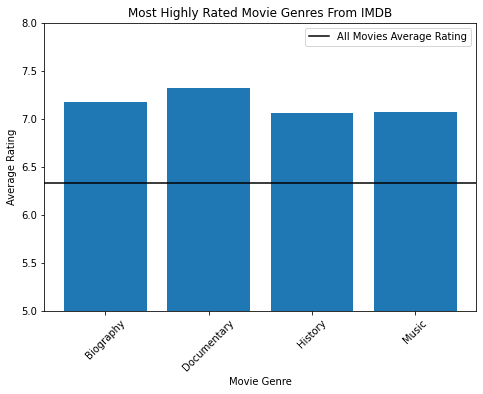

In [79]:
fig = plt.figure()

y = average_rating
genres = average_matched_genre
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation = 45)
plt.ylim(5,8)
ax.bar(genres,y)
plt.axhline(y = av_overall, color = 'k', linestyle = '-', label='All Movies Average Rating')
plt.xlabel('Movie Genre')
plt.ylabel('Average Rating')
plt.title('Most Highly Rated Movie Genres From IMDB')
plt.legend()
plt.show()
#realizing here that I probably need to go back and filter the genres that I plot to higher counts to avoid oultiers


### Movie Genre Analysis

The genres 'Biography, 'Documentary', 'History', and 'Music' have higher average ratings. 

## Movies by Original Language

Since the sheet from the movie database includes rating data (which we assume from the first exercise will lead to higher box office returns) we'll look to see if the original langauge of the movie could yield higher average ratings by language. 

In [80]:
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tmdb_movies.head()

# i see here that I have data on original langanges for movies and voting average, I'd like to see if there's
# a language that yields higher votes (suspecting english, maybe spanish)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [35]:
#filter release dates for movies in the last 10 years

tmdb_movies['release date_2'] = tmdb_movies['release_date'].apply(lambda x: int(x[:4]))
tmdb_movies = tmdb_movies[tmdb_movies['release date_2'] >= 2011]

In [36]:


tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23885 entries, 258 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         23885 non-null  int64  
 1   genre_ids          23885 non-null  object 
 2   id                 23885 non-null  int64  
 3   original_language  23885 non-null  object 
 4   original_title     23885 non-null  object 
 5   popularity         23885 non-null  float64
 6   release_date       23885 non-null  object 
 7   title              23885 non-null  object 
 8   vote_average       23885 non-null  float64
 9   vote_count         23885 non-null  int64  
 10  release date_2     23885 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.2+ MB


In [37]:
#noticing that there are far more movies in english, let's see if the have higher vote averages

tmdb_movies['original_language'].value_counts()

en    21057
fr      444
es      406
ru      257
ja      233
      ...  
sw        1
hz        1
kk        1
mi        1
hy        1
Name: original_language, Length: 76, dtype: int64

In [38]:
# rename the top five languages and add to a list

top_five_languages = ['English', 'French', 'Spanish', 'Russian', 'Japanese']

In [39]:
# find the vote average for each language

english = tmdb_movies[tmdb_movies['original_language'] == 'en']['vote_average'].mean()
french = tmdb_movies[tmdb_movies['original_language'] == 'fr']['vote_average'].mean()
spanish = tmdb_movies[tmdb_movies['original_language'] == 'es']['vote_average'].mean()
russian = tmdb_movies[tmdb_movies['original_language'] == 'ru']['vote_average'].mean()
japanese = tmdb_movies[tmdb_movies['original_language'] == 'ja']['vote_average'].mean()

average_vote_lang = [english, french, spanish, russian, japanese]
average_vote_lang

[5.970005223916131,
 6.201351351351349,
 6.3226600985221655,
 5.31089494163424,
 6.843347639484977]

In [40]:
# also look at the median vote average

med_english = tmdb_movies[tmdb_movies['original_language'] == 'en']['vote_average'].median()
med_french = tmdb_movies[tmdb_movies['original_language'] == 'fr']['vote_average'].median()
med_spanish = tmdb_movies[tmdb_movies['original_language'] == 'es']['vote_average'].median()
med_russian = tmdb_movies[tmdb_movies['original_language'] == 'ru']['vote_average'].median()
med_japanese = tmdb_movies[tmdb_movies['original_language'] == 'ja']['vote_average'].median()

median_vote_lang = [med_english, med_french, med_spanish, med_russian, med_japanese]
median_vote_lang

# it looks like both the median and mean show that japan has the highest vote average

[6.0, 6.2, 6.3, 5.6, 7.0]

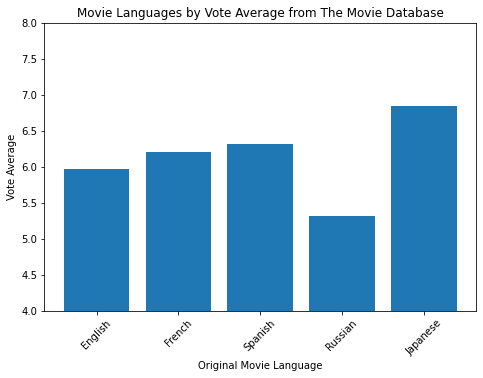

In [41]:
fig = plt.figure()

y = average_vote_lang
x = top_five_languages
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation = 45)
plt.ylim(4,8)
plt.xlabel('Original Movie Language')
plt.ylabel('Vote Average')
plt.title('Movie Languages by Vote Average from The Movie Database')
ax.bar(x,y)
plt.show()

### Movies by Original Language Analysis

The original hypthesis behind looking at the original languages in this sheet was that movies in English woudld have higher ratings because they will have have more votes. When looking at the data, we see that average ratings are higher for movies in Japanese and lower for those in Russian. I'd be curious to learn more about movies with high ratings in Japan and compare their box office results specifically. 

# Conclusions 

- Ensure that all movies that are produced are listed on highly used ratings websites like IMDB and Rotten Tomatoes so that potential viewers can both read and write reviews
- Consider running campaigns to get more viewers to leave reviews
- Start by producing movies that fall into the four highly rated genres surfaced in this report
- Microsoft should avoid producing movies in Russian while ramping up the production company

Next Steps:

- Dive deeper into movies that are produced in Japanese; why have they generated such high ratings?
- Explore data to surface experts that have produced movies highly rated movies in key highly rated genres 
- Consider allocating budget from other business units to engage with a consulting company to advise in the process of setting up a production company
